<a href="https://colab.research.google.com/github/sankalp-io/E-commerce-Shopper-Purchase-Prediction-Analysis-using-ML-/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [ ]:
df=pd.read_csv('/content/online_shoppers_intention (1).csv')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# checking accuracy before data preprocessing
X=df.drop('Revenue',axis=1)
y=df['Revenue']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 97%|█████████▋| 28/29 [00:51<00:01,  1.56s/it]

[LightGBM] [Info] Number of positive: 1526, number of negative: 8338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154704 -> initscore=-1.698173
[LightGBM] [Info] Start training from score -1.698173


100%|██████████| 29/29 [00:51<00:00,  1.78s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.90               0.77     0.77      0.90   
XGBClassifier                      0.89               0.77     0.77      0.89   
Perceptron                         0.82               0.77     0.77      0.83   
RandomForestClassifier             0.90               0.76     0.76      0.89   
NearestCentroid                    0.82               0.75     0.75      0.83   
AdaBoostClassifier                 0.89               0.75     0.75      0.88   
BernoulliNB                        0.84               0.74     0.74      0.85   
BaggingClassifier                  0.89               0.74     0.74      0.89   
DecisionTreeClassifier             0.86               0.73     0.73      0.86   
PassiveAggressiveClassifier        0.84               0.72     0.72      0.84   
GaussianNB                  

In [ ]:
# DATA PREPROCESSING
# 1 DATA CLEANING

In [ ]:
#1.1 CHECK MISSING VALUES
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
len(df.columns)

18

In [ ]:
#DROPPING FEATURES
df = df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [ ]:
len(df.columns)

15

In [ ]:
#1.2 OUTLIER ANALYSIS
# setup(data=df, target='Revenue',remove_outliers = True, outliers_threshold = 0.05)

In [ ]:
# 2 DATA TRANSFORMATION

In [ ]:
# 2.1 FEATURE CONSTRUCTION : LABEL ENCODING
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [ ]:
df['Month'] = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [ ]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.00,0.00,0.00,0.20,0.20,0.00,0.00,2,1,1,1,1,Returning_Visitor,0,0
1,0.00,0.00,64.00,0.00,0.10,0.00,0.00,2,2,2,1,2,Returning_Visitor,0,0
2,0.00,0.00,0.00,0.20,0.20,0.00,0.00,2,4,1,9,3,Returning_Visitor,0,0
3,0.00,0.00,2.67,0.05,0.14,0.00,0.00,2,3,2,2,4,Returning_Visitor,0,0
4,0.00,0.00,627.50,0.02,0.05,0.00,0.00,2,3,3,1,4,Returning_Visitor,1,0


In [ ]:
df.duplicated().value_counts()

False    12157
True       173
dtype: int64

In [ ]:
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)

       Administrative_Duration  Informational_Duration  \
158                       0.00                    0.00   
159                       0.00                    0.00   
178                       0.00                    0.00   
330                       0.00                    0.00   
356                       0.00                    0.00   
...                        ...                     ...   
11939                     0.00                    0.00   
12159                     0.00                    0.00   
12180                     0.00                    0.00   
12185                     0.00                    0.00   
12301                     0.00                    0.00   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                       0.00         0.20       0.20        0.00   
159                       0.00         0.20       0.20        0.00   
178                       0.00         0.20       0.20        0.00   
330                    

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# 2.2 NORMALIZATION : MIN-MAX METHOD
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']


#using pycaret
# setup(data=df, target='Revenue',
      # normalize = True, normalize_method = 'minmax')

#using sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
# 3 DATA REDUCTION USING PCA

In [ ]:
from pycaret.classification import *
setup(data=df, target='Revenue',pca = True, pca_method = 'linear')
# create_model('pca')
# evaluate_model()

# plot_model(model='pca', plot='explained_variance_ratio')

# # Finalize the PCA model for later use
# final_pca = finalize_model(get_model('pca'))

# transformed_data = predict_model(final_pca, data=df)

# print(transformed_data[['PC1', 'PC2']])

,Description,Value
0,Session id,876
1,Target,Revenue
2,Target type,Binary
3,Original data shape,"(12157, 15)"
4,Transformed data shape,"(12157, 17)"
5,Transformed train set shape,"(8509, 17)"
6,Transformed test set shape,"(3648, 17)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [ ]:
len(df.columns)

15

In [ ]:
#Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd

# Group the data by traffic type
grouped_data = df.groupby('TrafficType')

# Calculate average revenue per traffic type
average_revenue = grouped_data['Revenue'].mean()

# Calculate total revenue per traffic type
total_revenue = grouped_data['Revenue'].sum()

# Compare revenue across traffic types
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

# Print the revenue comparison
print(revenue_comparison)

             Average Revenue  Total Revenue
TrafficType                                
1                       0.11            262
2                       0.22            847
3                       0.09            180
4                       0.16            165
5                       0.22             56
6                       0.12             53
7                       0.30             12
8                       0.28             95
9                       0.10              4
10                      0.20             90
11                      0.19             47
12                      0.00              0
13                      0.06             43
14                      0.15              2
15                      0.00              0
16                      0.33              1
17                      0.00              0
18                      0.00              0
19                      0.06              1
20                      0.26             50


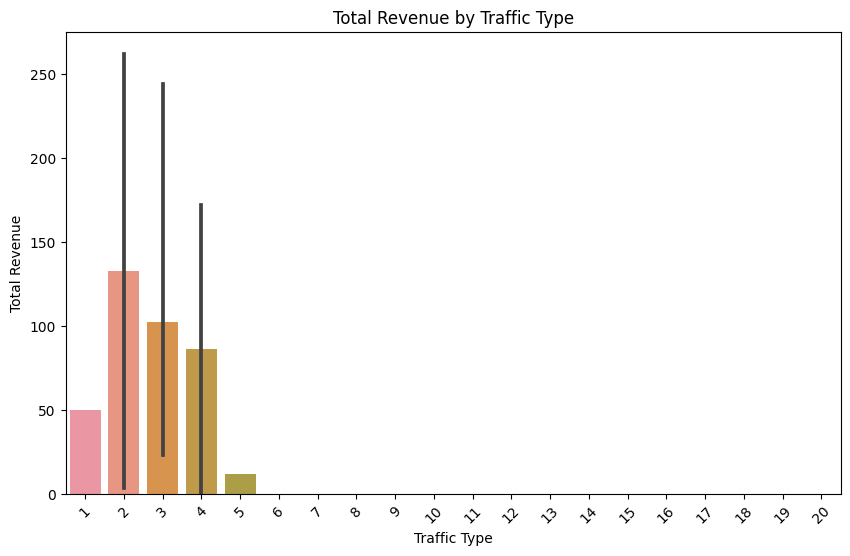

In [ ]:
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualize the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#traffic type 2 and traffic type 3 generates maximum revenue

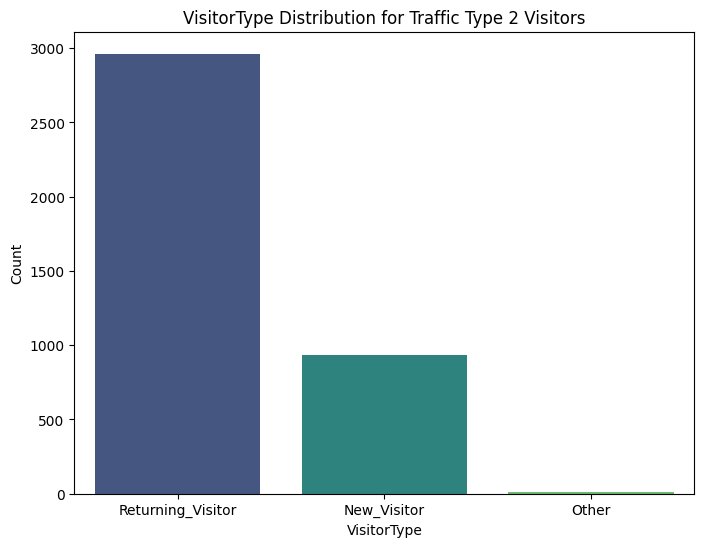

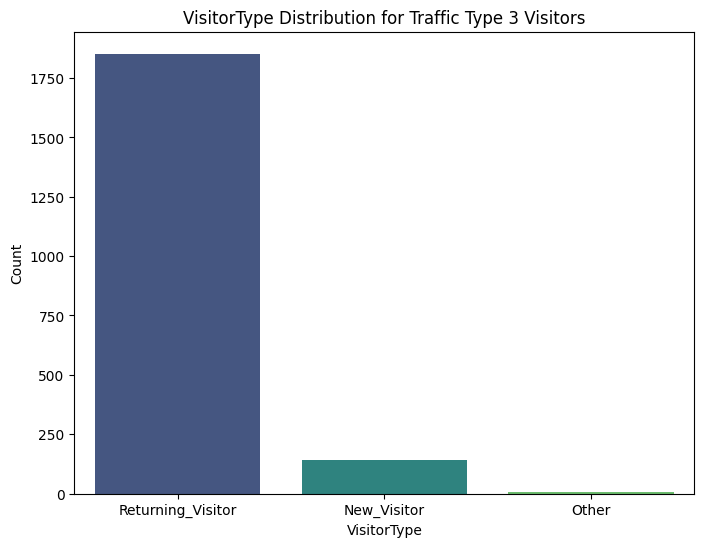

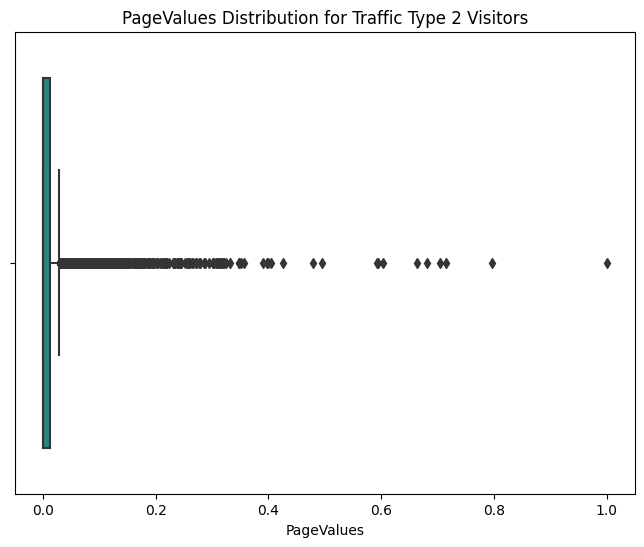

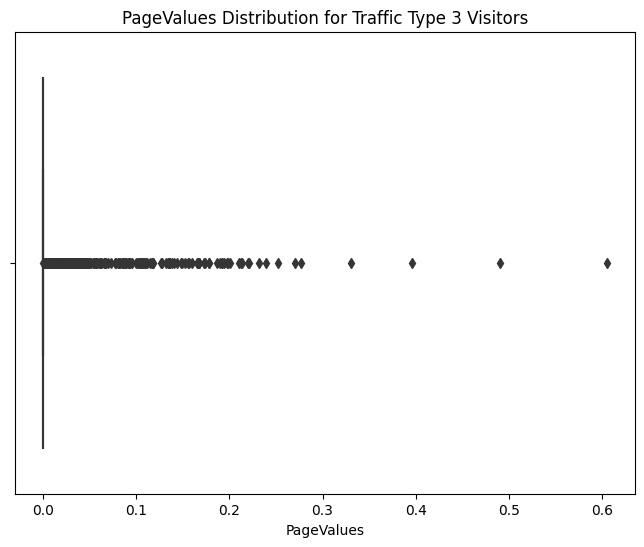

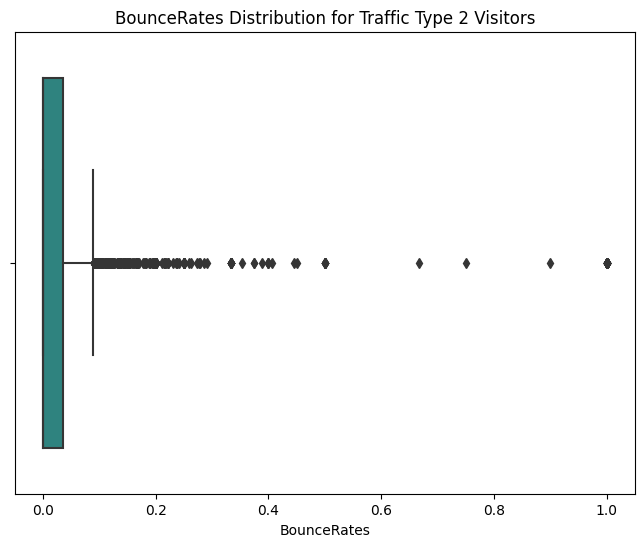

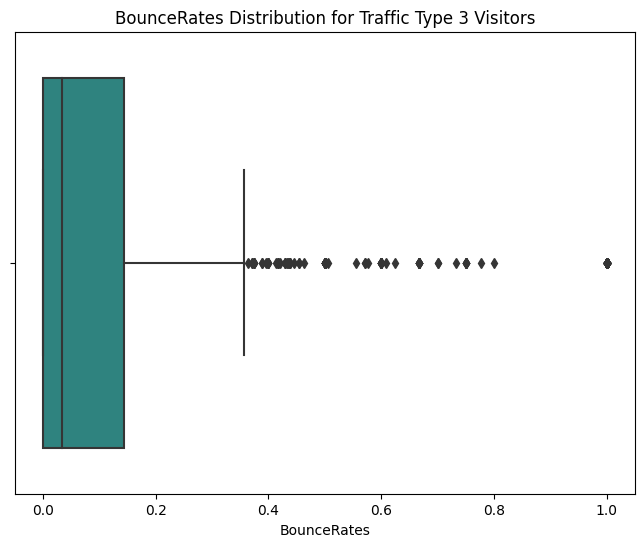

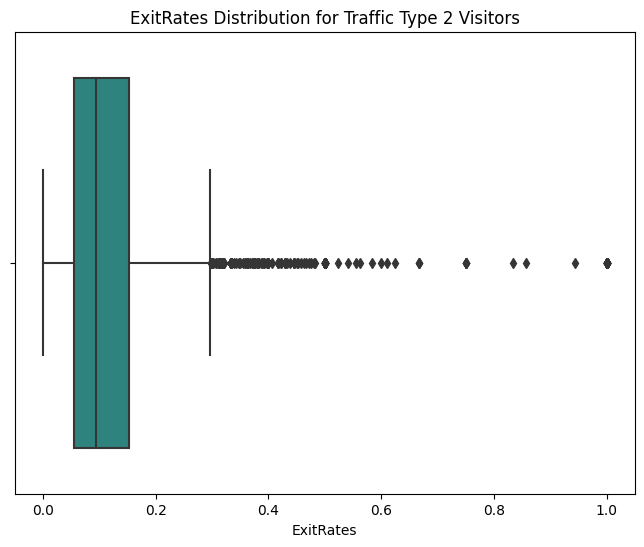

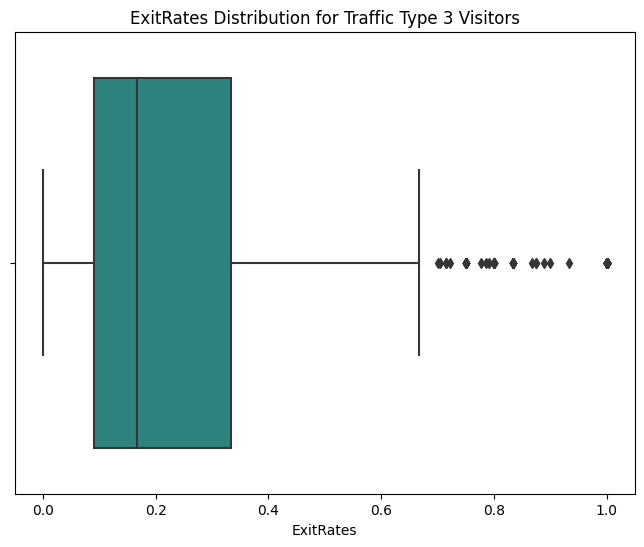

In [ ]:
# Filter the dataset for Traffic Type 2 visitors
traffic_type_2_data = df[df['TrafficType'] == 2]

# Filter the dataset for Traffic Type 3 visitors
traffic_type_3_data = df[df['TrafficType'] == 3]

# Demographic analysis
demographic_variables = ['VisitorType']

for variable in demographic_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

# Behavioral analysis
behavioral_variables = ['PageValues', 'BounceRates', 'ExitRates']

for variable in behavioral_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.show()

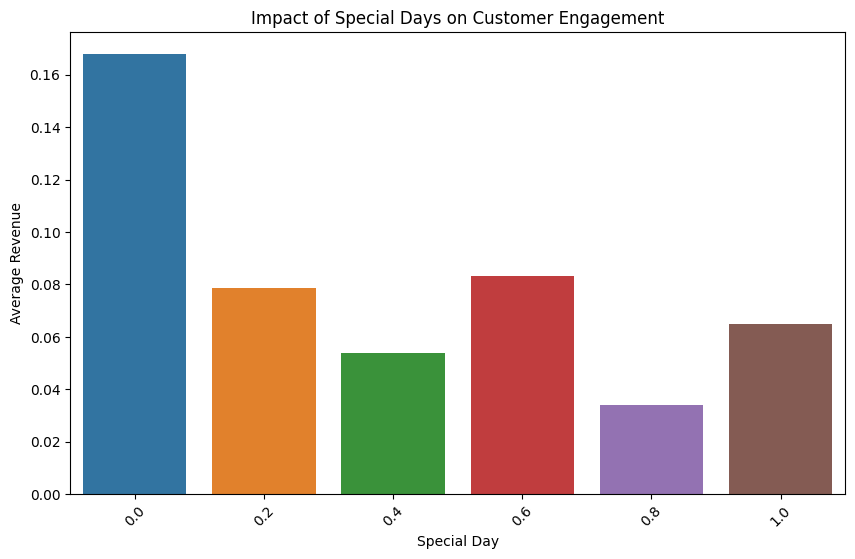

Special Days with the Highest Impact on Customer Engagement:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842


In [ ]:
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()  # Replace 'Revenue' with the appropriate metric

# Sort the data in descending order based on the average revenue or visitor count
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Visualize the impact of special days on customer engagement
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" )
plt.xticks(rotation=45)
plt.show()

# Identify the special days with the highest impact on customer engagement
top_special_days = special_day_analysis.head(3)  # Replace '3' with the desired number of top special days

print("Special Days with the Highest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")

<Axes: >

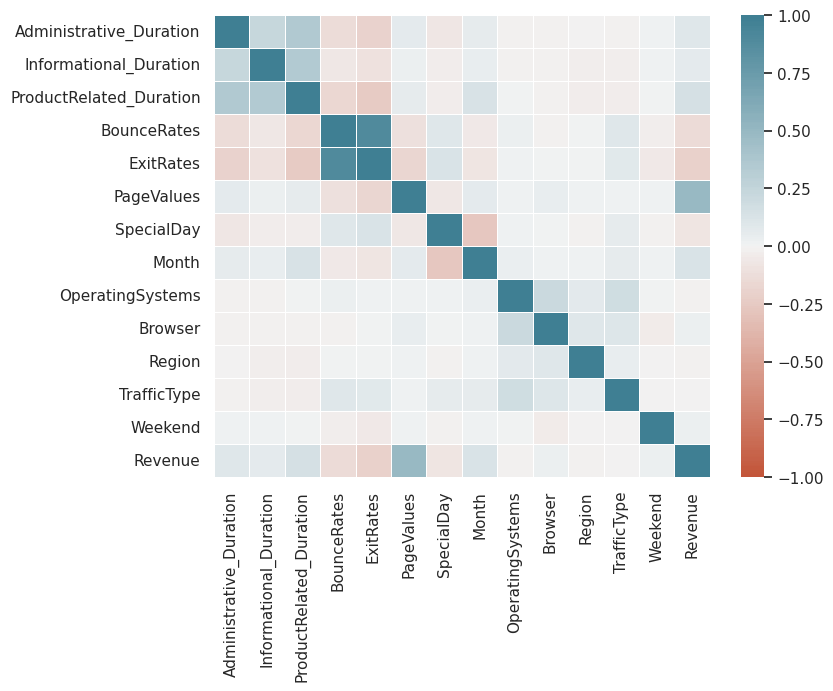

In [ ]:
corr=df.corr()
sns.set(style='white')
plt.figure(figsize=(8, 6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.5)

#Positive correlations are represented by lighter colors, negative correlations by darker colors, and no correlation by a neutral color.

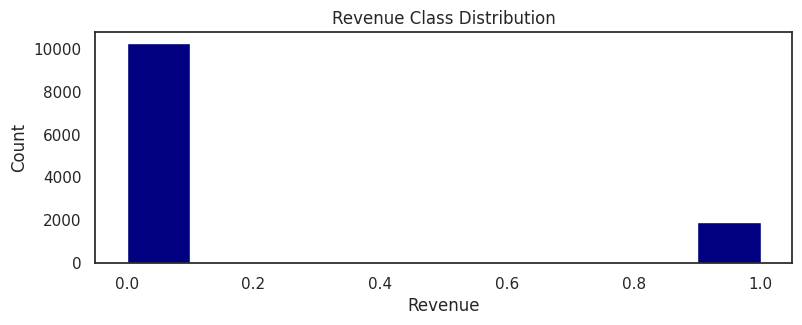

In [ ]:
# boolean_array = np.array([True, False, True])
# numeric_array = boolean_array.astype(int)

plt.figure(figsize=(9, 3))
plt.hist(df['Revenue'],color='navy')

plt.title('Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

# class imbalance (majority customers fall into  low revenue classes)

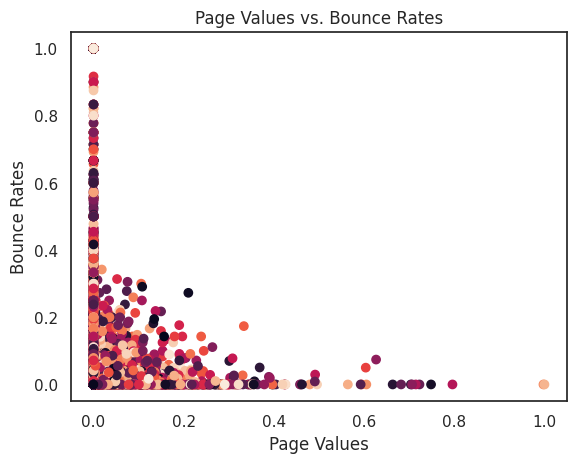

In [ ]:
N=len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'],c=colors)
plt.title('Page Values vs. Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()

In [ ]:
# negative correlation
#  outliers detected are
# (10, 120)
# (20, 140)
# (30, 160)
# (40, 180)
# (50, 200)  using interquantile range



In [ ]:
# Handling class Imbalance

In [ ]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2,1,1,1,1,Returning_Visitor,0,0
1,0.00,0.00,0.00,0.00,0.50,0.00,0.00,2,2,2,1,2,Returning_Visitor,0,0
2,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2,4,1,9,3,Returning_Visitor,0,0
3,0.00,0.00,0.00,0.25,0.70,0.00,0.00,2,3,2,2,4,Returning_Visitor,0,0
4,0.00,0.00,0.01,0.10,0.25,0.00,0.00,2,3,3,1,4,Returning_Visitor,1,0


In [ ]:
df['Revenue'].value_counts()

#tells unique value

0    10249
1     1908
Name: Revenue, dtype: int64

In [ ]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

# x : all features except the target"revenue" (independent)
# y : target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train.value_counts()

# Number of instances where y_train is 0 (no purchase)
# Number of instances where y_train is 1 (purchase)

0    8199
1    1526
Name: Revenue, dtype: int64

In [ ]:
y.value_counts()

0    10249
1     1908
Name: Revenue, dtype: int64

In [ ]:
y_test.value_counts()

0    2050
1     382
Name: Revenue, dtype: int64

In [ ]:
X_train.shape


(9725, 14)

In [ ]:
X_test.shape

(2432, 14)

In [ ]:
X_train[:10]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2811,0.00,0.00,0.01,0.08,0.23,0.00,0.40,5,2,5,3,3,Returning_Visitor,0
4466,0.01,0.00,0.05,0.03,0.11,0.02,0.40,5,2,5,2,3,Returning_Visitor,0
10593,0.03,0.00,0.01,0.00,0.06,0.05,0.00,11,2,2,1,10,Returning_Visitor,0
12153,0.00,0.00,0.00,0.14,0.21,0.00,0.00,12,3,2,1,20,New_Visitor,0
8359,0.00,0.00,0.02,0.13,0.22,0.00,0.00,12,2,5,3,1,Returning_Visitor,1
8743,0.04,0.12,0.03,0.04,0.14,0.00,0.00,11,1,1,1,2,Returning_Visitor,1
11400,0.00,0.10,0.16,0.03,0.12,0.00,0.00,12,2,2,1,2,Returning_Visitor,0
8840,0.02,0.00,0.03,0.02,0.13,0.00,0.00,11,1,1,2,8,Returning_Visitor,0
10633,0.00,0.00,0.00,0.33,0.67,0.00,0.00,11,1,1,9,3,Returning_Visitor,0
8426,0.00,0.00,0.01,0.00,0.50,0.00,0.00,11,2,2,4,1,Returning_Visitor,0


In [ ]:
# Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Apply SMOTE on the encoded features and target variable
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Convert the resampled target variable to a pandas Series
y_sm = pd.Series(y_sm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_train.value_counts()

0    8199
1    8199
Name: Revenue, dtype: int64

In [ ]:
# Comparing Machine learning Models

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 97%|█████████▋| 28/29 [02:03<00:02,  2.47s/it]

[LightGBM] [Info] Number of positive: 8199, number of negative: 8199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1862
[LightGBM] [Info] Number of data points in the train set: 16398, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [02:04<00:00,  4.28s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
RandomForestClassifier             0.93               0.93     0.93      0.93   
XGBClassifier                      0.92               0.92     0.92      0.92   
BaggingClassifier                  0.92               0.92     0.92      0.92   
LGBMClassifier                     0.92               0.92     0.92      0.92   
LabelSpreading                     0.90               0.90     0.90      0.90   
LabelPropagation                   0.90               0.90     0.90      0.90   
AdaBoostClassifier                 0.90               0.90     0.90      0.90   
ExtraTreeClassifier                0.89               0.89     0.89      0.89   
DecisionTreeClassifier             0.88               0.88     0.88      0.88   
SVC                         

In [ ]:
# PYCARET cm=compare_models()
from pycaret.classification import *
setup( data = df, target='Revenue' )
cm = compare_models()

,Description,Value
0,Session id,7187
1,Target,Revenue
2,Target type,Binary
3,Original data shape,"(12157, 15)"
4,Transformed data shape,"(12157, 17)"
5,Transformed train set shape,"(8509, 17)"
6,Transformed test set shape,"(3648, 17)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9028,0.9299,0.6149,0.7262,0.6648,0.6085,0.6121,1.3840
lightgbm,Light Gradient Boosting Machine,0.9015,0.9268,0.6104,0.7212,0.6602,0.6031,0.6066,1.0790
rf,Random Forest Classifier,0.9009,0.9231,0.5767,0.7353,0.6457,0.5892,0.5955,1.7860
et,Extra Trees Classifier,0.8979,0.9173,0.5168,0.7570,0.6131,0.5568,0.5708,0.9660
xgboost,Extreme Gradient Boosting,0.8934,0.9185,0.5828,0.6907,0.6312,0.5695,0.5729,0.2770
ada,Ada Boost Classifier,0.8893,0.9157,0.5738,0.6752,0.6193,0.5552,0.5583,0.9380
lda,Linear Discriminant Analysis,0.8780,0.8921,0.3199,0.7671,0.4501,0.3946,0.4431,0.1090
lr,Logistic Regression,0.8725,0.8651,0.2532,0.7935,0.3825,0.3324,0.4009,1.2640
ridge,Ridge Classifier,0.8697,0.0000,0.2262,0.7973,0.3513,0.3036,0.3793,0.1860
dt,Decision Tree Classifier,0.8613,0.7473,0.5812,0.5560,0.5678,0.4853,0.4858,0.4250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#RANDOM FOREST CLASSIFER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9258536585365854
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2050
           1       0.91      0.95      0.93      2050

    accuracy                           0.93      4100
   macro avg       0.93      0.93      0.93      4100
weighted avg       0.93      0.93      0.93      4100



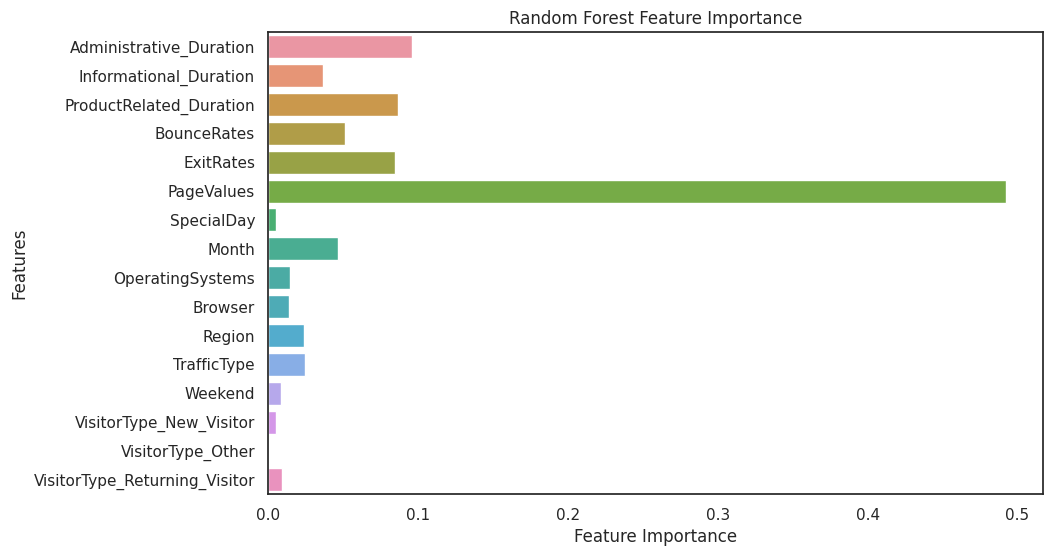

In [ ]:
feature_importances = rf.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

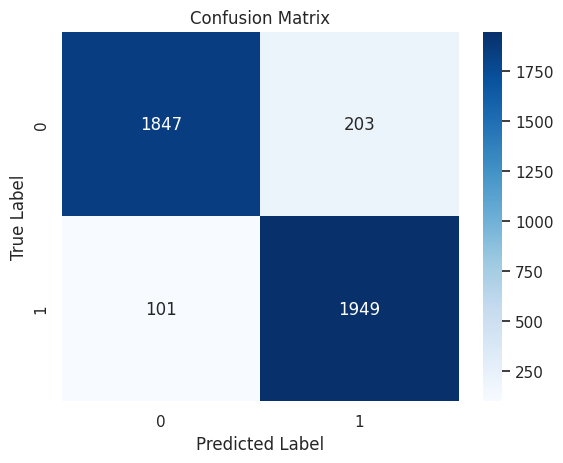

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [ ]:
# EXTRA TREES CLASSIFER
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred)
print('Extra Trees Accuracy:', accuracy_et)

print(f'Accuracy: {accuracy_et}')
print(classification_report(y_test, y_pred))

Extra Trees Accuracy: 0.9385365853658536
Accuracy: 0.9385365853658536
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2050
           1       0.92      0.97      0.94      2050

    accuracy                           0.94      4100
   macro avg       0.94      0.94      0.94      4100
weighted avg       0.94      0.94      0.94      4100



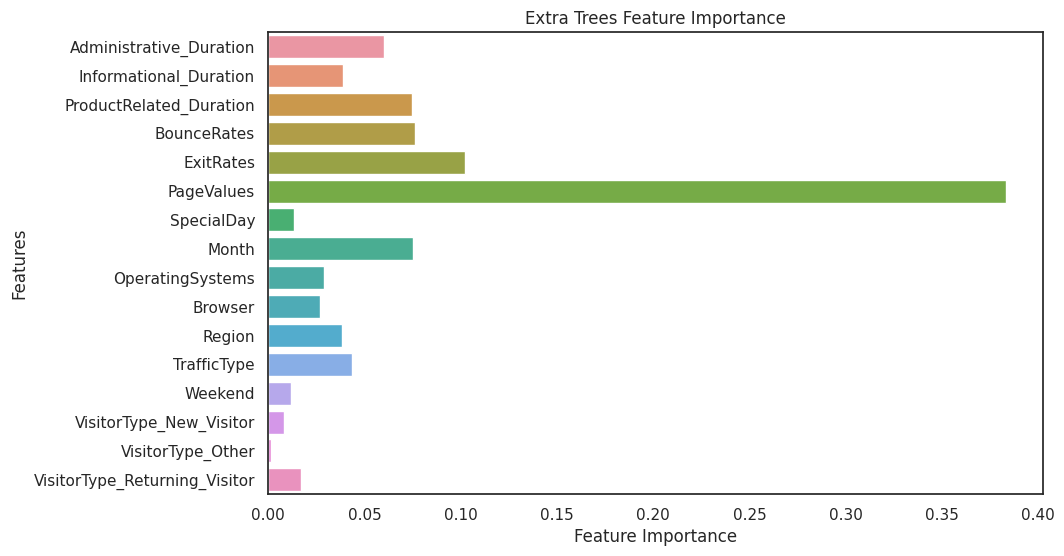

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2050
           1       0.92      0.97      0.94      2050

    accuracy                           0.94      4100
   macro avg       0.94      0.94      0.94      4100
weighted avg       0.94      0.94      0.94      4100



In [ ]:
#  Plot the feature importance
feature_importances = et.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Extra Trees Feature Importance')
plt.show()

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

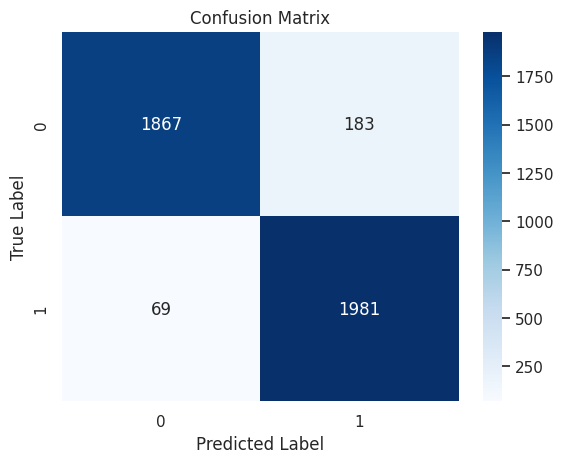

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#TESTING THE DATA

In [ ]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
user_input = {'Administrative_Duration': 50,
              'Informational_Duration': 100,
              'ProductRelated_Duration': 200,
              'BounceRates': 0.05,
              'ExitRates': 0.1,
              'PageValues': 20,
              'SpecialDay': 0,
              'Month': 7,
              'OperatingSystems': 0,
              'Browser': 0,
              'Region': 0,
              'TrafficType': 1,
              'VisitorType': 'New_Visitor',
              'Weekend': 1}

# user_input = {'Administrative_Duration': 8,
#               'Informational_Duration': 14.333,
#               'ProductRelated_Duration': 603.667,
#               'BounceRates': 0,
#               'ExitRates': 0.0125,
#               'PageValues': 44.67925,
#               'SpecialDay': 0,
#               'Month': 3,
#               'OperatingSystems': 2,
#               'Browser': 2,
#               'Region': 1,
#               'TrafficType': 7,
#               'VisitorType': 'Returning_Visitor',
#               'Weekend': 0}


In [ ]:
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

In [ ]:
visitor_type_mapping = {
    'New_Visitor': 1,
    'Other': 0,
    'Returning_Visitor': 0
}
# visitor_type_mapping = {
#     'New_Visitor': 0,
#     'Other': 0,
#     'Returning_Visitor': 1
# }


user_df['VisitorType_New_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Other'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Returning_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)

# Drop the original VisitorType column
user_df.drop('VisitorType', axis=1, inplace=True)

# Make a prediction for the user input
prediction = et.predict(user_df)
print(prediction)

#model ccuracy is approx 94%

[0]
